# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "../../starter_code/data/Mouse_metadata.csv"
study_results_path = "../../starter_code/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df_complete = pd.merge(mouse_metadata, study_results, on=["Mouse ID"])

# Display the data table for preview
mouse_metadata.head()
df_complete.tail()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4
1892,z969,Naftisol,Male,9,30,45,73.867845,4


In [2]:
study_results.head()
study_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 59.3+ KB


In [3]:
mouse_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Mouse ID      249 non-null    object
 1   Drug Regimen  249 non-null    object
 2   Sex           249 non-null    object
 3   Age_months    249 non-null    int64 
 4   Weight (g)    249 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 9.9+ KB


In [4]:
print(df_complete.shape)
df_complete.info()

(1893, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Drug Regimen        1893 non-null   object 
 2   Sex                 1893 non-null   object 
 3   Age_months          1893 non-null   int64  
 4   Weight (g)          1893 non-null   int64  
 5   Timepoint           1893 non-null   int64  
 6   Tumor Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 118.4+ KB


In [5]:
# Checking the number of mice.
num_mice = len(df_complete["Mouse ID"].value_counts())
num_mice

249

In [6]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
df_complete.groupby(["Mouse ID", "Timepoint"]).size().sort_values(ascending=False)

Mouse ID  Timepoint
g989      20           2
          15           2
          10           2
          5            2
          0            2
                      ..
i334      20           1
          15           1
          10           1
          5            1
z969      45           1
Length: 1888, dtype: int64

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
mask = df_complete["Mouse ID"] == 'g989'
df_complete.loc[mask]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [38]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mask2 = df_complete["Mouse ID"] != 'g989'
df2_complete = df_complete.loc[mask2].reset_index(drop=True)
df2_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [9]:
# Checking the number of mice in the clean DataFrame.
num_mice2 = len(df2_complete["Mouse ID"].value_counts())
num_mice2

248

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_mean = df2_complete.groupby(["Drug Regimen"])['Tumor Volume (mm3)'].mean()
tumor_median = df2_complete.groupby(["Drug Regimen"])['Tumor Volume (mm3)'].median()
tumor_var = df2_complete.groupby(["Drug Regimen"])['Tumor Volume (mm3)'].var()
tumor_std = df2_complete.groupby(["Drug Regimen"])['Tumor Volume (mm3)'].std()
tumor_sem = df2_complete.groupby(["Drug Regimen"])['Tumor Volume (mm3)'].sem()
df2_stats = {
    'Tumor Average': tumor_mean,
    'Tumnor Median': tumor_median,
    'Tumor Variance': tumor_var,
    'Tumor Standard Deviation': tumor_std,
    'Tumor SEM': tumor_sem
}
stats = pd.DataFrame(df2_stats)
stats
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
# df_stats = df2_complete.groupby(["Drug Regimen"])

,Tumor Average,Tumnor Median,Tumor Variance,Tumor Standard Deviation,Tumor SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
cols_agg = {
    "Tumor Volume (mm3)": ['mean', 'median', 'var', 'std', 'sem']
}
final_df = df2_complete.groupby(['Drug Regimen']).agg(cols_agg)
final_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<Axes: xlabel='Drug Regimen'>

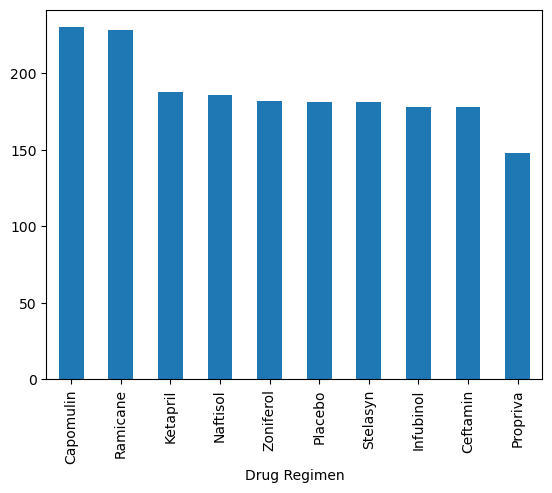

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
df2_complete['Drug Regimen'].value_counts().plot(kind='bar')

Text(0, 0.5, '# of ')

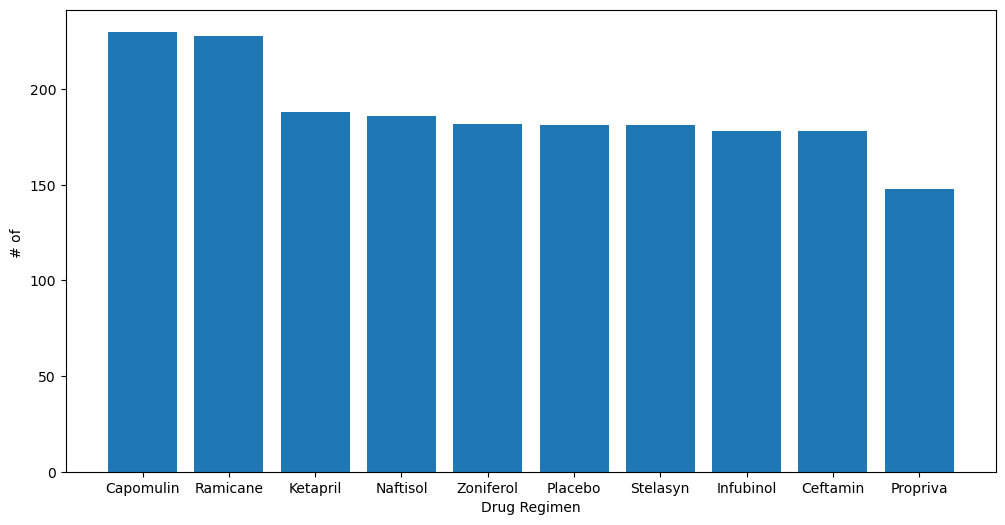

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
data = df2_complete['Drug Regimen'].value_counts()
x = data.index
y = data.values
plt.figure(figsize=(12,6))
plt.bar(x, y)
plt.xlabel('Drug Regimen')
plt.ylabel('# of ')

<Axes: ylabel='count'>

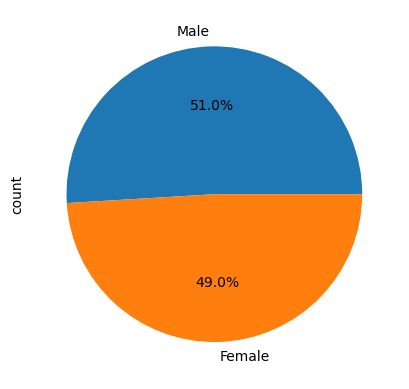

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
df2_complete['Sex'].value_counts().plot(kind='pie', autopct='%1.1f%%')

In [32]:
mask = df2_complete.Sex == 'Male'
df_male = df2_complete.loc[mask]['Sex'].count()
mask2 = df2_complete.Sex == 'Female'
df_female = df2_complete.loc[mask2]['Sex'].count()

([<matplotlib.patches.Wedge at 0x22881e86620>,
 [Text(-0.03308201408261547, 1.0995024239828841, 'male'),
  Text(0.033082014082615095, -1.0995024239828841, 'female')],
 [Text(-0.01804473495415389, 0.5997285948997549, '51.0%'),
  Text(0.018044734954153686, -0.5997285948997549, '49.0%')])

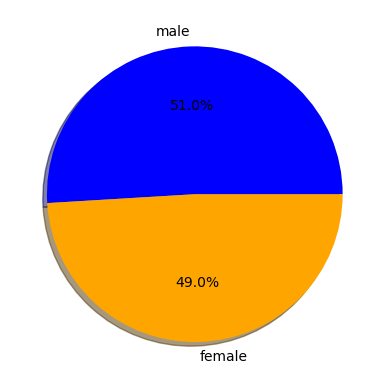

In [33]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['male', 'female']
sizes = [df_male, df_female]
colors = ['blue', 'orange']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)


## Quartiles, Outliers and Boxplots

In [36]:
import seaborn as sns

In [56]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


#GOT FROM PROF
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
df3 = df2_complete.groupby('Mouse ID').Timepoint.max().reset_index()
sub = df2_complete.loc[:, ['Mouse ID', 'Timepoint', 'Drug Regimen', 'Tumor Volume (mm3)']]
df3 = pd.merge(df3, sub, on=['Mouse ID', 'Timepoint'])
mask = df3['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol',  'Ceftamin'])
df3 = df3.loc[mask].reset_index(drop=True)
df3

,Mouse ID,Timepoint,Drug Regimen,Tumor Volume (mm3)
0,a203,45,Infubinol,67.973419
1,a251,45,Infubinol,65.525743
2,a275,45,Ceftamin,62.999356
3,a411,45,Ramicane,38.407618
4,a444,45,Ramicane,43.047543
...,...,...,...,...
95,y769,45,Ceftamin,68.594745
96,y793,45,Capomulin,31.896238
97,y865,45,Ceftamin,64.729837
98,z578,45,Ramicane,30.638696


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


<function matplotlib.pyplot.show(close=None, block=None)>

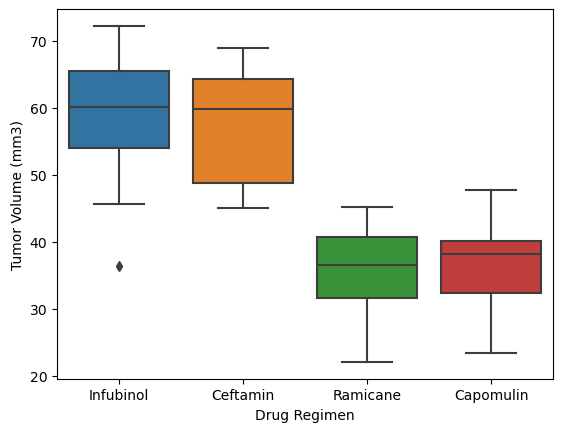

In [57]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
sns.boxplot(data=df3, x='Drug Regimen', y='Tumor Volume (mm3)')
plt.show

## Line and Scatter Plots

In [59]:
mask = df2_complete['Drug Regimen'] == 'Capomulin'
cap = df2_complete.loc[mask]
cap

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1439,r157,Capomulin,Male,22,25,0,45.000000,0
1440,r157,Capomulin,Male,22,25,5,45.597064,0
1441,r157,Capomulin,Male,22,25,10,46.059608,0


(40.0, 50.0)

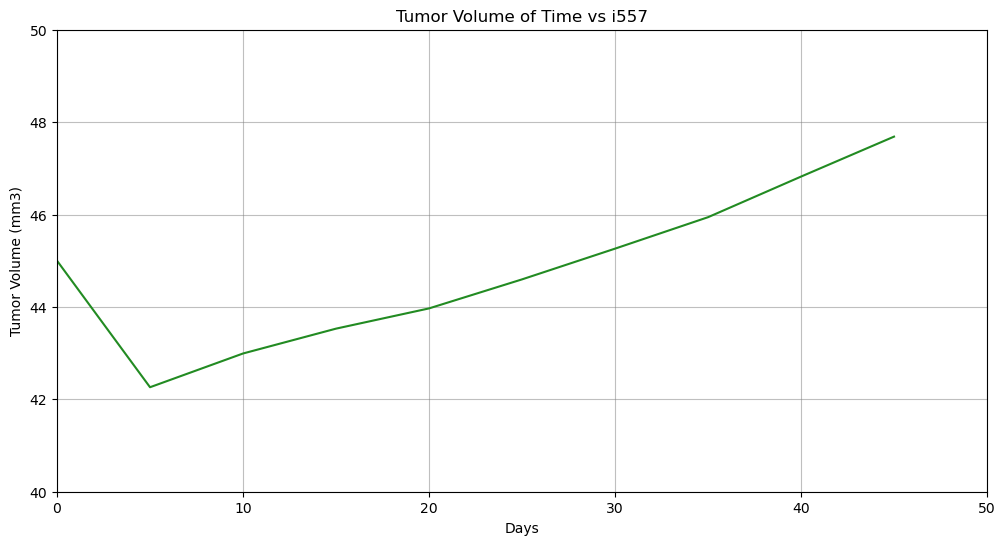

In [72]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
df2_complete.loc[df2_complete['Drug Regimen'] == 'Capomulin']
mouse = 'i557'
data = df2_complete.loc[df2_complete['Mouse ID'] == mouse]

time = data['Timepoint']
y = data['Tumor Volume (mm3)']
plt.figure(figsize=(12,6))
plt.plot(time, y, color='forestgreen')

plt.xlabel('Days')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume of Time vs i557')
plt.grid(color='grey', alpha=0.5)
plt.xlim(0, 50)
plt.ylim(40, 50)

Text(0.5, 1.0, 'Mouse Weight vs Average Observed Tumor')

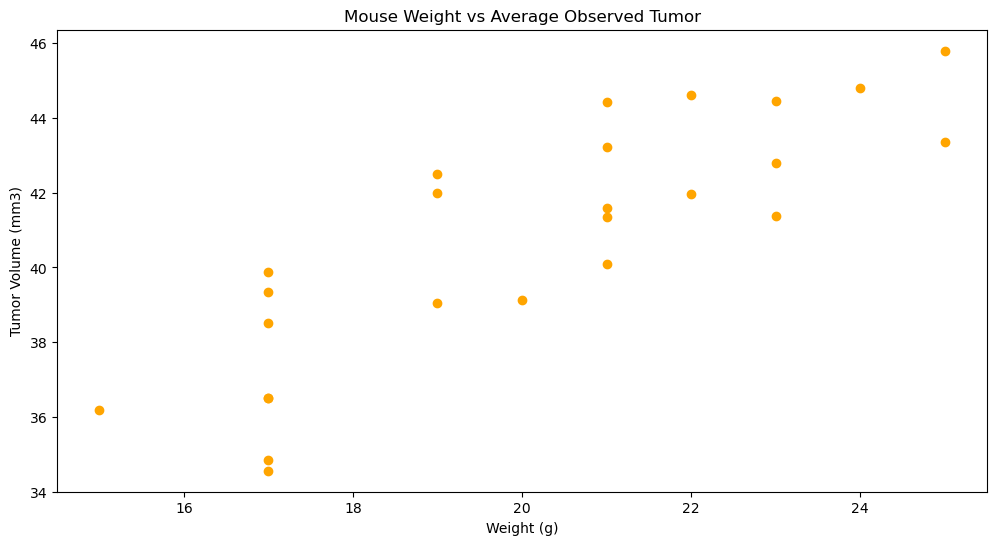

In [103]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
data = df2_complete.loc[df2_complete['Drug Regimen'] == 'Capomulin']
df4 = data.groupby('Mouse ID').agg({'Weight (g)': 'mean', 'Tumor Volume (mm3)': 'mean'}).reset_index()
x = df4['Weight (g)']
y = df4['Tumor Volume (mm3)']
plt.figure(figsize=(12,6))
plt.scatter(df4['Weight (g)'], df4['Tumor Volume (mm3)'], color='orange')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Mouse Weight vs Average Observed Tumor')

## Correlation and Regression

In [104]:
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [105]:
corrs = df4.corr(numeric_only = True)
corrs

,Weight (g),Tumor Volume (mm3)
Weight (g),1.000000,0.841936
Tumor Volume (mm3),0.841936,1.000000


The r-squared is: 0.7088568047708723


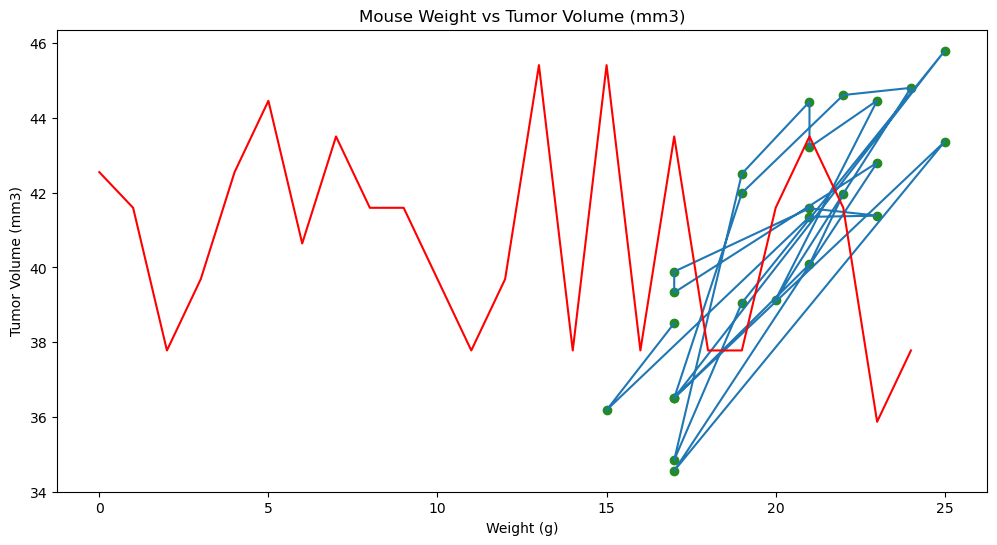

In [107]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x = df4['Weight (g)']
y = df4['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept, 2))

plt.figure(figsize=(12, 6))
plt.scatter(x, y, facecolor='forestgreen')
plt.plot(x, y, regress_values, 'r-')

plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Mouse Weight vs Tumor Volume (mm3)')

print(f"The r-squared is: {rvalue**2}")
plt.show()